<h2><center>ASSIGNMENT 3 -- GROUP 28</center></h2>
<h2><center>Name: DEEP JARIWALA, VASU PATEL, SAYONEE PARIKH</center></h2>
<h2><center>SID: 20909290, 20891386, 20919577</center></h2>
<h2><center>Problem 4</center></h2>

### IMPORTING LIBRARIES

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

### GIVEN PARAMETERS

In [2]:
# Given Parameters

# DEVICE LOCATIONS
devices = [[0, 30, 3], [50, 60, 4], [100, 30, 3]]

# Average measure RSSI when reciever is 1m away from the transmitter node
A = -50

# Path loss
n = 4

# Standard_deviation
sd = 5.1

### IMPORTANT FUNCTIONS USED TO CALCULATE RSSI AND FINGERPRINT OF THE TILES

In [3]:
# RSSI profile as a function of distance for d = 1 to 140m
def rssi_model(dist):
    RSSI = []
    for i in range(len(dist)):
        calc = -10*n*np.log(dist[i]) + A
        RSSI.append(calc)
    return RSSI

# calculate 3d distance
def dist_3d(d1, d2):
    x1 = d1[0]
    y1 = d1[1]
    z1 = d1[2]
    x2 = d2[0]
    y2 = d2[1]
    z2 = d2[2]
    d = math.sqrt(pow(x2 - x1, 2) + pow(y2 - y1, 2) + pow(z2 - z1, 2) * 1.0);
    return d

# RSSI profile as a function of distance for d = 1 to 140m
def rssi_model_sd(dist):
    RSSI = []
    for i in range(len(dist)):
        val = round(random.uniform(-1 ,1))
        if val == -1:
            calc = -10*n*np.log(dist[i]) + A - sd
        elif val == 0:
            calc = -10*n*np.log(dist[i]) + A
        else:
            calc = -10*n*np.log(dist[i]) + A + sd
        RSSI.append(calc)
    return RSSI

# Fingerprint generator for all the center tiles RSSI 
def fingerprint_generator(tile, devices):
    tile_print = []
    for i in range(len(tile)):
        rssi_temp = [1, 1, 1]
        for j in range(len(devices)):
            dis = [dist_3d(tile[i], devices[j])]
            rssi_temp[j] = rssi_model(dis)
        tile_print.append(rssi_temp)
    return tile_print

# RSSI 
def rssi_dist_calc(tile, devices):
    given_dist = []
    for i in range(len(tile)):
        rssi_calc = [1, 1, 1]
        for j in range(len(devices)):
            dis = [dist_3d(tile[i], devices[j])]
            rssi_calc[j] = rssi_model_sd(dis)
        given_dist.append(rssi_calc)
    return given_dist

# Finding closest rssi finger print 
def find_closest_rssi(roaming_obj, defined_prints):
    diff_arr = []
    diff = [1, 1, 1]
    for i in range(len(defined_prints)):
        for j in range(3):
            diff[j] = abs(defined_prints[i][j] - roaming_obj[0][j])
        diff_arr.append(sum(diff))
    return diff_arr

### RSSI AS A FUNCTION OF DISTANCE

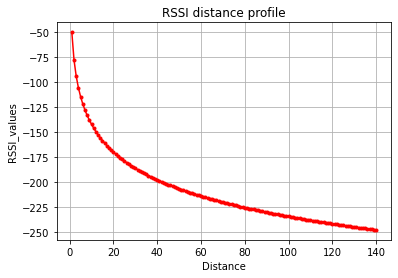

In [5]:
d = []
for i in range(1,141):
    d.append(i)
rssi_values = rssi_model(d)

# Plot for rssi and distance

plt.plot(d, rssi_values, c = 'r', marker = '.')
plt.xlabel('Distance')
plt.ylabel('RSSI_values')
plt.title('RSSI distance profile')
plt.grid()
plt.show()

### COORDINATES OF TILE

In [6]:
# Tile formation (X-Y is considered as floor)

tile = []
s_x = 0.5
s_y = 0.5
s_z = 0
for i in range(60):
    for j in range(10):
        temp = [s_x, s_y, s_z]
        tile.append(temp)
        s_x += 10
    s_x = 0.5
    s_y += 1

### FORMING TILES

In [7]:
prints_tile = fingerprint_generator(tile, devices)
prints_tile = np.array(prints_tile)
prints_tile = prints_tile.reshape(len(prints_tile),3)

roaming_device = [[30, 45, 0]]

In [8]:
prints_tile

array([[-185.58707128, -224.0119499 , -235.70802922],
       [-187.9439953 , -220.80451781, -231.85252168],
       [-193.39469708, -217.90728966, -227.63533716],
       ...,
       [-223.48222933, -171.57576751, -199.34170624],
       [-228.07494549, -187.05541941, -192.76940192],
       [-232.2534483 , -198.24924443, -187.53560949]])

### REPEATING THE CALCULATION OF ROAMING DEVICE 10 TIMES TO FIND THE AVERAGE

In [9]:
location_values = []
for i in range(10):
    rssi_reading_roaming_point = rssi_dist_calc(roaming_device, devices)
    rssi_reading_roaming_point = np.array(rssi_reading_roaming_point)
    rssi_reading_roaming_point = rssi_reading_roaming_point.reshape(1,3)
    diff_saved = find_closest_rssi(rssi_reading_roaming_point, prints_tile)
    diff_saved_min = diff_saved.index(min(diff_saved))
    location_values.append(tile[diff_saved_min])

In [10]:
x = []
y = []
z = []
for i in range(len(location_values)):
    x.append(location_values[i][0])
    y.append(location_values[i][1])
    z.append(location_values[i][2])
predicted_location = [sum(x)/10, sum(y)/10, sum(z)/10]

In [11]:
original_location = [30, 45, 0]
print(f" The predicted location is {predicted_location}")

 The predicted location is [29.5, 44.7, 0.0]


In [12]:
location_error = dist_3d(original_location, predicted_location)
print(f"The distance error observed : {round(location_error, 4)} units")

The distance error observed : 0.5831 units


### TRILATERATION 3D

In [13]:
def trilaterate3D(distances):
    p1=np.array(distances[0][:3])
    p2=np.array(distances[1][:3])
    p3=np.array(distances[2][:3])       
    p4=np.array(distances[3][:3])
    r1=distances[0][-1]
    r2=distances[1][-1]
    r3=distances[2][-1]
    r4=distances[3][-1]
    e_x=(p2-p1)/np.linalg.norm(p2-p1)
    i=np.dot(e_x,(p3-p1))
    e_y=(p3-p1-(i*e_x))/(np.linalg.norm(p3-p1-(i*e_x)))
    e_z=np.cross(e_x,e_y)
    d=np.linalg.norm(p2-p1)
    j=np.dot(e_y,(p3-p1))
    x=((r1**2)-(r2**2)+(d**2))/(2*d)
    y=(((r1**2)-(r3**2)+(i**2)+(j**2))/(2*j))-((i/j)*(x))
    z1=np.sqrt(r1**2-x**2-y**2)
    z2=np.sqrt(r1**2-x**2-y**2)*(-1)
    ans1=p1+(x*e_x)+(y*e_y)+(z1*e_z)
    ans2=p1+(x*e_x)+(y*e_y)+(z2*e_z)
    dist1=np.linalg.norm(p4-ans1)
    dist2=np.linalg.norm(p4-ans2)
    if np.abs(r4-dist1)<np.abs(r4-dist2):
        return ans1
    else: 
        return ans2

In [18]:
dist = [[0, 30, 3, 33.68], [50, 60, 4, 25.32], [100, 30, 3, 71.65], [0, 0, 0, 54.08]]
tri_ans = trilaterate3D(dist)

In [20]:
final_ans_trilateration = []
for i in tri_ans:
    final_ans_trilateration.append(round(i, 3))

In [22]:
final_ans_trilateration
print(f"The location using trilateration is : {final_ans_trilateration}")

The location using trilateration is : [30.003, 45.0, -0.027]


### COMPARISON BETWEEN BOTH METHODS

In [24]:
error = dist_3d(predicted_location, final_ans_trilateration)
print(f"The error between both the methods : {error}")

The error between both the methods : 0.5862917362542289
